# CS110 - Activity Scheduler

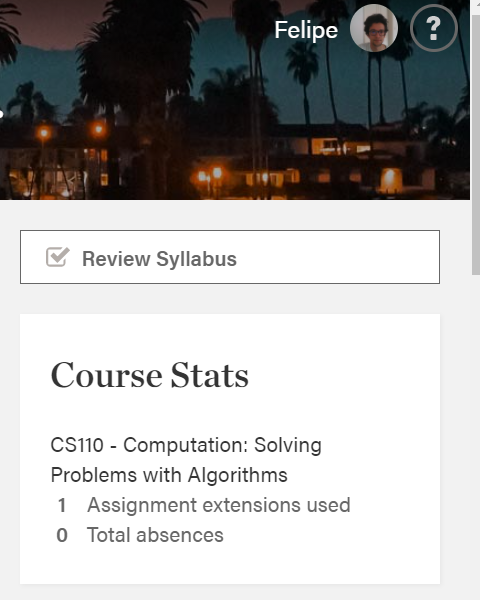

| Task      |  Motivation  | Image |
| ----------- | ----------- | ---------|
| <ol><li>Finish this assignment<ol><li>Plan</li><li>Writing parts</li><li>Coding Parts</ol></li></ol>   | I need to do this before I can do the other things   | ![cs](https://thumbs.dreamstime.com/z/young-guy-crying-wiping-away-tears-sad-man-front-laptop-concept-144309842.jpg)
|  <ol><li>Go to karaoke<ol><li>Invite friends</li><li>Buy alcohol</li><li>Take a bus to location</ol></li></ol>      | It's a very popular Korean activity and one of the few entertainment venues that are Covid safe        | ![karaoke](https://lh3.googleusercontent.com/sSTfEietEU2ZtBoP6H3Q6v5TF10XDrGD2rk0xRDAJR6XKiXdc-FArvQH6DBNMCyu5i-tzt94LmtiVdY6M0YAOSd1Q_0Svslo6-M=w1200-h630-rj-pp-e365)
|  <ol><li>Plan Jeju island trip<ol><li>Check calendar</li><li>Rent airbnb</li><li>Buy plane tickets</ol></li></ol>  | I want to go there during the next break. It's supposed to be super pretty. But I need to plan the trip first        |   ![jeju](https://tul.imgix.net/content/article/Jeju_Island_Korea.jpeg?auto=format,compress&w=520&h=390&fit=crop)
|  <ol><li>Visit Bongeunsa temple<ol><li>Recharge T-money card</li><li>Learn about it</li><li>Take the bus there</ol></li></ol> |   Bongeunsa is a Buddhist temple is Seoul that has a lot of history about the city's past and its religious side      |   ![temple](https://c8.alamy.com/comp/GPCTAM/sunset-at-bongeunsa-temple-of-downtown-skyline-in-seoul-city-south-GPCTAM.jpg)
|  <ol><li>Make hotteok<ol><li>Find recipe</li><li>Buy ingredients</li><li>cook</ol></li></ol>  | This might be the best dessert I've ever eaten. I need to learn how to make it.  | ![hotteok](https://upload.wikimedia.org/wikipedia/commons/9/97/Hotteok.jpg)

#### How I will store the data

I will store all tasks and subtasks in a nested list. Each task will be represented as a list containing id, description, duration, dependencies, status, and priority . In order to differentiate subtasks from tasks, I will include the subtask ids as dependencies for the overall task, so that the task can only be completed when the subtasks are done. 

#### How the scheduler works

The scheduler uses a priority queue to define which tasks to do first. First, the algorithm selects all tasks that have no dependencies and inputs them into a priority queue. The queue works by maintaining a min-heap structure at all times, using the task priorities as the keys. A heap is defined as the array form of a binary tree where each node has a value that is at a minimum the value of its parent. This ensures that the first value in the array is always the value with the smallest key. In the context of the task scheduler, the first item is always the item with the smallest priority value. (Note that smaller values for priority mean bigger actual priority).

There are two ways to define a priority in my scheduler.The user can manually define the priority of some tasks and the scheduler will define the priority of the rest. We calculate the priority of a task 'a' by counting how many tasks depend on a. The more tasks depend on a, the more priority it will have. This ensures that the tasks that unlock the most other tasks are done first. 


In [1]:
# Heap class taken from pre-class work
# I modified it to accept a task as input, instead of a number.

# Defining some basic binary tree functions
def left(i):             # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1       #          returns the array index of its left child.

def right(i):            # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2       #           returns the array index of its right child.

def parent(i):           # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2      #            returns the array index of its parent

In [2]:
class MinHeapq:
    """ 
    This class implements properties and methods that support a min 
    priority queue data structure
    
    Attributes
    ----------
    heap : list
        A Python list where key values in the min heap are stored
        
    heap_size : int
        An integer counter of the number of keys present in the min heap
        
    """ 
    
    
    def __init__(self):
        """
        Class initialization method.
        
        Note
        ----
        Use heapq_var = MinHeap()
        
        """
        self.heap       = []
        self.heap_size  = 0

        
    def mink(self):
        """
        This method returns the lowest key in the priority queue
        
        Note
        ----
        Use key_var = heap_var.mink()
        
        """
        return self.heap[0] 
    
     
    def heappush(self, item):   
        """
        Inserts the task onto the priority queue, maintaining the
        min heap invariant.
        
        Note
        ----
        Use heapq_var.heappush(key)
        
        """
        item[-2] = float('inf')
        self.heap.append(item)
        self.decrease_key(self.heap_size, item, item[0])
        self.heap_size+=1
        
        
    def decrease_key(self, i, item, key): 
        """
        This method implements the DECREASE_KEY operation, which modifies 
        the value of a key in the min priority queue with a smaller value. 
        
        Note
        ----
        Use heapq_var.decrease_key(i, new_key)
        
        """
        if key > self.heap[i][-2]:
            raise ValueError('new key is bigger than the current key')
        self.heap[i][-2] = key
        while i > 0 and self.heap[parent(i)][-2] > self.heap[i][-2]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
        
    def heapify(self, i):
        """
        This method implements the MIN_HEAPIFY operation for the min priority
        queue. The input is the array index of the root node of the subtree to 
        be heapify.
        
        Note
        ----
        Use heapq_var.heapify(i)
        
        """
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]<heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)


    def heappop(self):
        """
        This method implements the EXTRACT_MIN operation. It returns the task with the smallest
        key in the min priority queue and removes this task from the min priority 
        queue.
        
        Note
        ----
        Use key_var = heapq_var.heappop() 
        
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink
    
    def length(self):
        return self.heap_size


In [3]:
"""
Scheduler adapted from class activity
"""
 
def print_input_tasks(tsks):
    """ 
    Input: list of tasks 
    Task Status:
    - 'N' : Not yet in priority queue (default status)
    - 'I' : In priority queue
    - 'C' : Completed
    Output: print statement with all the tasks to be included in the scheduler
    """
    print('Input List of Tasks \n')
    for t in tsks:
        print(f"task:{t[0]} \t {t[1]} \t duration:{t[2]} \t depends on: {t[3]} \t Priority: {t[-2]} \t Status: {t[-1]} ")
    print('\n')


def initialize_tasks( tsks ):
    """
    Input: list of tasks 
    Output: initializes all tasks with default status (not yet in the priority queue).
    """  
    for i in range(len(tsks)):
        tasks[i].append('N')

def unscheduled_tasks( tsks ):
    """
    Input: list of tasks 
    Output: boolean (checks the status of all tasks and returns `True` if at least one task has status = 'N')
    """
    for t in tsks:
        if t[-1] == 'N':
            return True
    return False


def remove_dependency( tsks, tid ):
    """
    Input: list of tasks and task_id of the task just completed
    Output: lists of tasks with t_id removed
    """
    for t in range(len(tsks)):
        if tsks[t][0] != tid and tid in tsks[t][3]:
            tsks[t][3].remove(tid)

def count_dependency( tsks, tid ):
    """
    Input: list of tasks and task_id of the task just completed
    Output: lists of tasks with t_id removed
    """
    count = 0
    for t in range(len(tsks)):
        if tsks[t][0] == tid:
            index = t
        if tsks[t][0] != tid and tid in tsks[t][3]:
            count += 1
    return count, index


def get_ready_tsks( tsks ):
    """ 
    Implements step 1 of the scheduler
    Input: list of tasks
    Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
    """
    rtsks = []
    for i in range(len(tsks)):
        if tsks[i][-1] == 'N' and not tsks[i][3]:   # If tasks has no dependencies and is not yet in queue
            tsks[i][-1] = 'I'                       # Change status of the task
            rtsks.append(tsks[i])  # add (task_id, duration) to the list of tasks 
                                                   # to be pushed onto the priority queue                                      
    return rtsks

def add_tasks_pqueue(pqueue, rtsks):
    """ 
    Implements step 2 of the scheduler
    Input: list of tasks
    Output: priority queue
    """  
    if rtsks:
        if not pqueue.heap_size:  # If the priority queue does not exist, create one
            pqueue.heap = rtsks
            pqueue.heap_size = len(rtsks)
            ### 1 line of code required (make pqueue a priority queue)
            pqueue.heapify(0)
        else:
            for t in rtsks:
                ### 1 line of code required (if the priority queue is already created, we can insert new elements into the queue)
                pqueue.heappush(t)           
    return pqueue

def define_priority(tasks):  
    """ 
    Defines the priorities of the unprioritized tasks. 
    Priorities are define as max((10 - number of tasks that depend on current task), 0)
    Input: list of tasks
    Output: list of tasks
    """  
    unprioritized = [task for task in tasks if type(task[-1]) != int]
    for i in unprioritized:
        count, index = count_dependency(tasks, i[0])
        priority = max(10-count, 0)
        tasks[index].append(priority)
    return tasks 

def prep_scheduler(tasks, step_sz = 10, c_time = 480):
    
    # Inputs Parameters to the Scheduler
    step_sz = step_sz  # step size of scheduler in minutes
    c_time = c_time  # current time is set to the initial time in minutes (8:00 AM = 8x60)

    ntasks = len(tasks)  # Number of tasks
    

    # STEP 0: Initialize the status of all tasks in the input list
    initialize_tasks(tasks)
    print_input_tasks(tasks)
    return tasks



In [4]:
# Tasks to be included in the scheduler. They have the following format:
# [id, description, time, dependencies, priority (optional)] where priority ranges from 0 (max priority) to 10 (min priority)

tasks = [[1.0, 'Finish the CS110 assignment', 0, [1.1,1.2,1.3], 0], 
         [1.1, 'Plan the CS1120 Assignment', 40, [], 0],
         [1.2, 'Do the writing part',80, [1.1], 0],
         [1.3, 'Do the coding part',120,[1.1], 0],
         [2.0, 'Go to Karaoke',60,[1, 1.2, 1.1, 2.1,2.2,2.3], ],
         [2.1, 'Invite friends',10,[], ],
         [2.2, 'Buy alcohol',15,[1, ], ],
         [2.3, 'Take bus to Karaoke',20,[2.1,2.2], 3],
         [3.0, 'Plan Jeju Island trip', 0, [1, 3.1,3.2,3.3], 5], 
         [3.1, 'Check calendar', 10, [], 1],
         [3.2, 'Rent AirBnB',120, [], 1],
         [3.3, 'Buy plane tickets',80,[3.2], 8],
         [4.0, 'Visit Bongeunsa temple',15,[4.1,4.2,4.3], ],
         [4.1, 'Recharge T-money',5,[], 4],
         [4.2, 'Learn about Bongeunsa temple',15,[], ],
         [4.3, 'Take bus to Bongeunsa temple',5,[4.1], ],
         [5.0, 'Make Hotteok', 0, [5.1,5.2,5.3], 9], 
         [5.1, 'Find recipe', 40, [], 4],
         [5.2, 'Buy ingredients',80, [5.1], ],
         [5.3, 'Cook Hotteok',120,[5.1,5.2], ],
        ]


In [5]:
def start_scheduler(tasks, step_sz=10, c_time=480):
    """ 
    This function schedules tasks for you!
    
    Arguments
    ----------
    tasks : list
        A nested list with the tasks to be executed. Tasks must be in the format [id, description, time, dependencies, priority]
        
    step_sz : int
        The step size of the sheduler
        
    c_time : int
        Current time is set to the initial time in minutes (8:00 AM = 8x60)
        
    """
    # Define priorities
    tasks = define_priority(tasks)

    # Prepare tasks
    tasks = prep_scheduler(tasks, step_sz=step_sz, c_time=c_time)

    # Priority Queue
    pqueue = MinHeapq()

    # While there are tasks to be scheduled or there are tasks in the pqueue
    while unscheduled_tasks(tasks) or pqueue.heap_size:
        #STEP 1: Extract tasks ready to execute (those without dependencies)
        rtsks = get_ready_tsks(tasks)

        #STEP 2: Push the tasks onto the priority queue
        pqueue = add_tasks_pqueue(pqueue, rtsks)

        if pqueue.heap_size:  #STEP 3: Check for tasks in the priority queue.
            # 1 line of code required for STEP 4: get the tasks on top of the priority queue
            task = pqueue.heappop()
            tid = task[0]
            rtime = task[2]
            print(
                f" ⏰Simple Scheduler at time: {c_time//60}h{c_time%60:02d} \n executing task: {tid} remaining time: {rtime} \n"
            )
            tstep = step_sz  # tstep is the scheduler's time step
            if rtime < step_sz:  # If it is less than the step_size take a smaller time step
                tstep = rtime
            rtime -= tstep  # STEP 5: adjust the tasks remaining time
            c_time += tstep  # update the schedulers clock

            if rtime == 0:  # STEP 7: Task has been completed
                print(
                    f"✅ Completed Task {tid} - '{task[1]}' at time {c_time//60}h{c_time%60:02} \n"
                )
                #(if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list)
                remove_dependency(tasks, tid)
            else:
                #(if the task hasn't finished yet, push it back onto the priority queue with the updated remaining time to completion
                task[2] = rtime
                pqueue.heappush(task)

    print("🏁 Completed all planned tasks")


start_scheduler(tasks, step_sz=30)

Input List of Tasks 

task:1.0 	 Finish the CS110 assignment 	 duration:0 	 depends on: [1.1, 1.2, 1.3] 	 Priority: 0 	 Status: N 
task:1.1 	 Plan the CS1120 Assignment 	 duration:40 	 depends on: [] 	 Priority: 0 	 Status: N 
task:1.2 	 Do the writing part 	 duration:80 	 depends on: [1.1] 	 Priority: 0 	 Status: N 
task:1.3 	 Do the coding part 	 duration:120 	 depends on: [1.1] 	 Priority: 0 	 Status: N 
task:2.0 	 Go to Karaoke 	 duration:60 	 depends on: [1, 1.2, 1.1, 2.1, 2.2, 2.3] 	 Priority: 10 	 Status: N 
task:2.1 	 Invite friends 	 duration:10 	 depends on: [] 	 Priority: 8 	 Status: N 
task:2.2 	 Buy alcohol 	 duration:15 	 depends on: [1] 	 Priority: 8 	 Status: N 
task:2.3 	 Take bus to Karaoke 	 duration:20 	 depends on: [2.1, 2.2] 	 Priority: 3 	 Status: N 
task:3.0 	 Plan Jeju Island trip 	 duration:0 	 depends on: [1, 3.1, 3.2, 3.3] 	 Priority: 5 	 Status: N 
task:3.1 	 Check calendar 	 duration:10 	 depends on: [] 	 Priority: 1 	 Status: N 
task:3.2 	 Rent AirBnB 	 d

### Multi-tasking

A. My goal with the multi-tasking is to minimize the time spent doing the tasks while working within two constraints: only two tasks can be done at once and one should always do the biggest priority task first.To do so in my code, I will first include one item in each list of tasks which will describe whether the task can be done with others or not. In the actual scheduler, I will add a section that checks if the next task to be done can be multi-tasked. If yes, the algorithm will check the remaining tasks searching for another task to be done together with the first. If it finds one, we execute both tasks together. To do so, we need to modify the print statements to demonstrate we are handling two tasks at once and we need to keep track of two remaining times, one for each task. Otherwise, the code will be pretty much the same. I decided to only allow two tasks to be done together, both for simplicity and because it is unrealistic that one would be able to do more.

B. There are two types of constraints. One is that a task cannot be done until its dependencies are completed. This constraint is handled before inserting the tasks in the priority queue. The second constraint is that we want to execute tasks in order of priority. This is well done by the priority queue by using a min-heap algorithm, as explained above.

In [6]:
# Tasks to be included in the scheduler. They have the following format:
# [id, description, time, dependencies, multi_tasking, priority]

tasks = [
    [1.0, 'Finish the CS110 assignment', 0, [1.1, 1.2, 1.3],False, 0],
    [1.1, 'Plan the CS1120 Assignment', 40, [],False, 0],
    [1.2, 'Do the writing part', 80, [1.1],False, 0],
    [1.3, 'Do the coding part', 120, [1.1],False, 0],
    [2.0, 'Go to Karaoke', 60, [2.1, 2.2, 2.3],False, 3],
    [2.1, 'Invite friends', 10, [],True, 1],
    [2.2, 'Buy alcohol', 15, [],True, 3],
    [2.3, 'Take bus to Karaoke', 20, [2.1, 2.2],True, 3],
    [3.0, 'Plan Jeju Island trip', 0, [3.1, 3.2, 3.3],False, ],
    [3.1, 'Check calendar', 10, [],True, 3],
    [3.2, 'Rent AirBnB', 120, [],False, ],
    [3.3, 'Buy plane tickets', 80, [3.2],False, ],
    [4.0, 'Visit Bongeunsa temple', 15, [4.1, 4.2, 4.3],True, 6],
    [4.1, 'Recharge T-money', 5, [],True, 2],
    [4.2, 'Learn about Bongeunsa temple', 15, [],True, 8],
    [4.3, 'Take bus to Bongeunsa temple', 5, [4.1],True, ],
    [5.0, 'Make Hotteok', 0, [5.1, 5.2, 5.3],True, 4],
    [5.1, 'Find recipe', 40, [],False, ],
    [5.2, 'Buy ingredients', 80, [5.1],False, ],
    [5.3, 'Cook', 120, [5.1, 5.2],True, 4],
]


In [7]:
def start_scheduler(tasks,  step_sz = 10, c_time = 480):
    """ 
    This function schedules tasks for you and allows for multi_tasking!
    
    Arguments
    ----------
    tasks : list
        A nested list with the tasks to be executed. Tasks must be in the format [id, description, time, dependencies, priority]
        
    step_sz : int
        The step size of the sheduler
        
    c_time : int
        Current time is set to the initial time in minutes (8:00 AM = 8x60)
    """
    # Define priorities
    tasks = define_priority(tasks)
    
    # Prepare tasks
    tasks = prep_scheduler(tasks, step_sz = step_sz, c_time = c_time)
    
    
    pqueue = MinHeapq() # Priority Queue
    while unscheduled_tasks(tasks) or pqueue.heap_size:
        #STEP 1: Extract tasks ready to execute (those without dependencies) 
        rtsks = get_ready_tsks( tasks )

        #STEP 2: Push the tasks onto the priority queue
        pqueue = add_tasks_pqueue(pqueue, rtsks)

        if pqueue.heap_size:  #STEP 3: Check for tasks in the priority queue.        
            # 1 line of code required for STEP 4: get the tasks on top of the priority queue
            task = pqueue.heappop()
            tid = task[0]
            rtime  = task[2]
            
            
            multi = task[4]
            
            # if you can multitask 
            if multi == True and pqueue.heap_size > 1:
                multi_lst = [task]
                keep = []
                
                # try to find another task to do together
                for i in range(pqueue.heap_size):
                    multi_task = pqueue.heappop()
                    
                    # if you do, save it and exit the loop
                    if multi_task[4] == True:
                        multi_lst.append(multi_task)
                        break
                    keep.append(multi_task)
                    
                # Put tasks back in priority queue 
                for i in keep:
                    pqueue.heappush(i)
                
                # if there are two tasks to be multi-tasked
                if len(multi_lst) > 1:
                    
                    
                    # define the ids and remaining time for both tasks
                    tid1 = multi_lst[0][0]
                    rtime1  = multi_lst[0][2]
                    tid2 = multi_lst[1][0]
                    rtime2 = multi_lst[1][2]  
                    task1 = multi_lst[0]
                    task2 = multi_lst[1]

                    print(f" ⏰Simple Scheduler at time: {c_time//60}h{c_time%60:02d} \n executing tasks: {tid1} and {tid2} remaining times: {rtime1} and {rtime2} \n")
                    tstep = step_sz                        # tstep is the scheduler's time step
                    
                    if rtime1 < step_sz or rtime2 < step_sz:                    # If it is less than the step_size take a smaller time step
                        tstep = min(rtime1, rtime2)


                    rtime1 -= tstep                  # STEP 5: adjust the tasks remaining time
                    rtime2 -= tstep
                    c_time += tstep                # update the schedulers clock

                    if rtime1 == 0:                         # STEP 7: Task has been completed
                        print(f"✅ Completed Task {tid1} - '{multi_lst[0][1]}' at time {c_time//60}h{c_time%60:02} \n") 
                        #(if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list)
                        remove_dependency(tasks, tid1)
                    else:
                        #(if the task hasn't finished yet, push it back onto the priority queue with the updated remaining time to completion
                        task1[2] = rtime1
                        pqueue.heappush(task1) 

                    if rtime2 == 0:                         # STEP 7: Task has been completed
                        print(f"✅ Completed Task {tid2} - '{multi_lst[1][1]}' at time {c_time//60}h{c_time%60:02} \n") 
                        #(if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list)
                        remove_dependency(tasks, tid2)
                    else:
                        #(if the task hasn't finished yet, push it back onto the priority queue with the updated remaining time to completion
                        task2[2] = rtime2
                        pqueue.heappush(task2)                     
                
            else:
                    
                print(f" ⏰Simple Scheduler at time: {c_time//60}h{c_time%60:02d} \n executing task: {tid} remaining time: {rtime} \n")
                tstep = step_sz                        # tstep is the scheduler's time step
                if rtime < step_sz:                    # If it is less than the step_size take a smaller time step
                    tstep = rtime
                rtime -= tstep                  # STEP 5: adjust the tasks remaining time
                c_time += tstep                # update the schedulers clock

                if rtime == 0:                         # STEP 7: Task has been completed
                    print(f"✅ Completed Task {tid} - '{task[1]}' at time {c_time//60}h{c_time%60:02} \n") 
                    #(if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list)
                    remove_dependency(tasks, tid)
                else:
                    #(if the task hasn't finished yet, push it back onto the priority queue with the updated remaining time to completion
                    task[2] = rtime
                    pqueue.heappush(task)


    print("🏁 Completed all planned tasks")

start_scheduler(tasks, step_sz = 30)

Input List of Tasks 

task:1.0 	 Finish the CS110 assignment 	 duration:0 	 depends on: [1.1, 1.2, 1.3] 	 Priority: 0 	 Status: N 
task:1.1 	 Plan the CS1120 Assignment 	 duration:40 	 depends on: [] 	 Priority: 0 	 Status: N 
task:1.2 	 Do the writing part 	 duration:80 	 depends on: [1.1] 	 Priority: 0 	 Status: N 
task:1.3 	 Do the coding part 	 duration:120 	 depends on: [1.1] 	 Priority: 0 	 Status: N 
task:2.0 	 Go to Karaoke 	 duration:60 	 depends on: [2.1, 2.2, 2.3] 	 Priority: 3 	 Status: N 
task:2.1 	 Invite friends 	 duration:10 	 depends on: [] 	 Priority: 1 	 Status: N 
task:2.2 	 Buy alcohol 	 duration:15 	 depends on: [] 	 Priority: 3 	 Status: N 
task:2.3 	 Take bus to Karaoke 	 duration:20 	 depends on: [2.1, 2.2] 	 Priority: 3 	 Status: N 
task:3.0 	 Plan Jeju Island trip 	 duration:0 	 depends on: [3.1, 3.2, 3.3] 	 Priority: 10 	 Status: N 
task:3.1 	 Check calendar 	 duration:10 	 depends on: [] 	 Priority: 3 	 Status: N 
task:3.2 	 Rent AirBnB 	 duration:120 	 dep

### Computational Critique

The main benefit of using a priority queue with a heap structure instead of a sorted list is superior in terms of computational power. Creating a heap out of n items has  a time complexity of O(n) and adding a new element while maintaining the heap property takes O(logn). If we used a sorting algorithm, each time a new item is added, we would need to sort the entire list again, which would take at least O(n). 

In terms of usability, the scheduler is not very user friendly. We have to define tasks with lists, which could get confusing and any tiny mistake would break the code. Furthermore, the output is very long; it would be better to output a concise table with times and the starts of each activity. 

It is hard to quantify the efficiency of the schedule, as many variables can be used to classify it. One possible metric to measure the efficiency is the time spent to perform all tasks, but a more holistic metric is preferable. For example, we could measure how 'realistic' the schedule is, which includes how many times it suggests something illogical, how many details it considers (such as location), etc. Overall, I would say that the schedule generated is mostly consistent and logical, but there are a few failures. First, because we collect the tasks without dependencies all together, it is possible to start a task and then jump to another task when the logical step would be to do the next subtask. We can see this in the first few tasks: we start the CS110 assignment, then buy alcohol for the karaoke, then go back to the assignment. Other problems that could appear are tasks being alternated because they have the same priority, or the code running forever if the input contains a task that cannot be done.

We could also consider the problems that are due to lack of information. For example, we don't inform the scheduler about locations or times of tasks, so it could create some bizarre scheduler where one wakes up at 5 pm, or takes class while in a trip to Jeju island. 

I would not use the scheduler to plan my day because currently it does not consider some crucial information such as location and time of activity. Even if I added those functionalities, in order to provide a good result it needs to be fed a lot of information, which takes too much time. I could use it as a general outline of what I have to do, or to check if I can realistically do all the tasks in the same day.


## HC Appendix

#constraints - I identify the constraints for the assignment instructions, such as the type of input that the scheduler must take and the data structure I have to use. Knowing that these constraints cannot be changed, I adapt my initial idea (including additional information for each task in order to determine its priority) to determining priority based solely on the dependencies. Furthermore, I identify the constraints of my algorithm, including its multiple shortcomings and propose future improvements.

#optimization - in the multi-tasking algorithm, I identify the objective function I want to minimize (time spent doing the tasks) and the constraints (only two tasks at once and highest priority first). Following these guidelines, I develop an algorithm that is constantly trying to minimize time by multi-tasking as much as it can, which results in a 40 minute change in the duration of the tasks. 

#designthinking - I employed an iterative design thinking approach to developing the scheduler. First, I developed an MVP using the code from pre-class work. Based on feedback from the students in class, I modified the prototype to improve its #codereadability. After that, I continuously tested and improved the code, using different kinds of input. In the reflection, I identify problems which I didn't have time to solve.